In [1]:
# Carregando alguns módulos essenciais para trabalharmos os dados
# Removendo warnings chatos
import warnings
warnings.filterwarnings('ignore')
# Carregando as principais bibliotecas com o 'import'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 

# Carregando os dados
dados = pd.read_csv('dados_fifa22.csv',index_col=0)

In [2]:
dados.head()

,nome_jogador,nota_geral,nota_potencial,valor_eur,salario_eur,idade,altura_cm,peso_kg,pe_fraco,habilidade,rescisao_eur,ritmo,chute,passe,drible,defesa,fisico,mentalidade_visao,mentalidade_compostura,mentalidade_posicionamento,poder_salto,poder_stamina,poder_forca,posicao
1,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,4,4,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,81,88,95,85,76,86,Atacante
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,4,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,76,95,95,95,77,77,Atacante
4,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,5,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,89,88,63,89,74,Meio campo
5,J. Oblak,91,93,112000000.0,130000.0,28,188,87,3,1,238000000.0,NaN,NaN,NaN,NaN,NaN,NaN,65,68,11,78,41,78,Goleiro
6,K. Mbappé,91,95,194000000.0,230000.0,22,182,73,4,5,373500000.0,97.0,88.0,80.0,92.0,36.0,77.0,82,88,92,78,88,77,Atacante


Nesse dataset, temos acesso a muitos atributos de jogo de cada um dos jogadores. Vamos listar aqui as `features`que temos disponíveis:
- `nome_jogador`: Nome abreviado do jogador
- `nota_geral`: Habilidade geral
- `nota_potencial`: Habilidade máxima que o jogador pode atingir
- `valor_eur`: Preço do jogador em Euros
- `salario_eur`: Salário em Euros
- `idade`: Idade
- `altura_cm`: Altura em cm
- `peso_kg`: Peso em kg
- `pe_fraco`: Desequilíbrio entre habilidade dos pés
- `habilidade`: Nível de habilidade com a bola
- `rescisao_eur`: Clausula de rescisão em Euros
- `ritmo`: Ritmo de corrida do jogador
- `chute`: Força de chute

- `passe`: Habilidade de passe
- `drible`: Habilidade de drible
- `defesa`: Habilidade de defesa
- `fisico`: Habilidade de físico
- `mentalidade_visao`: Mentalidade de visão
- `mentalidade_compostura`: Mentalidade de compostura
- `mentalidade_posicionamento`: Mentalidade de posicionamento
- `poder_salto`: Mentalidade de posicionamento
- `poder_stamina`: Mentalidade de posicionamento
- `poder_forca`: Mentalidade de posicionamento
- `posicao`: Posição do jogador. **É a nossa variável de interesse!**

## 1. Entendimento dos Dados e EDA

Como em qualquer problema de aprendizado de máquina, vamos começar analisando a base e os dados que temos disponíveis!

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13307 entries, 1 to 19237
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nome_jogador                13307 non-null  object 
 1   nota_geral                  13307 non-null  int64  
 2   nota_potencial              13307 non-null  int64  
 3   valor_eur                   13258 non-null  float64
 4   salario_eur                 13265 non-null  float64
 5   idade                       13307 non-null  int64  
 6   altura_cm                   13307 non-null  int64  
 7   peso_kg                     13307 non-null  int64  
 8   pe_fraco                    13307 non-null  int64  
 9   habilidade                  13307 non-null  int64  
 10  rescisao_eur                12485 non-null  float64
 11  ritmo                       11175 non-null  float64
 12  chute                       11175 non-null  float64
 13  passe                       111

In [4]:
# Aplicando o .describe(), lembrando que ele irá considerar apenas dados numéricos
dados.describe().T # Transpondo a matriz para facilitar a visualização

,count,mean,std,min,25%,50%,75%,max
nota_geral,13307.0,6.554986e+01,6.906385e+00,47.0,61.0,65.0,70.0,92.0
nota_potencial,13307.0,7.076862e+01,6.070027e+00,49.0,67.0,71.0,75.0,95.0
valor_eur,13258.0,2.638622e+06,7.199541e+06,9000.0,450000.0,900000.0,1900000.0,194000000.0
salario_eur,13265.0,8.727211e+03,1.853377e+04,500.0,1000.0,3000.0,8000.0,350000.0
idade,13307.0,2.542354e+01,4.833458e+00,16.0,21.0,25.0,29.0,54.0
altura_cm,13307.0,1.828960e+02,6.612938e+00,155.0,178.0,183.0,188.0,206.0
peso_kg,13307.0,7.642271e+01,7.028497e+00,51.0,72.0,76.0,81.0,110.0
pe_fraco,13307.0,2.869317e+00,6.656493e-01,1.0,2.0,3.0,3.0,5.0
habilidade,13307.0,2.161494e+00,7.161338e-01,1.0,2.0,2.0,3.0,5.0
rescisao_eur,12485.0,4.962701e+06,1.414924e+07,16000.0,736000.0,1500000.0,3400000.0,373500000.0


Vamos agora explorar a nossa variável de interesse, que é a `posicao`:

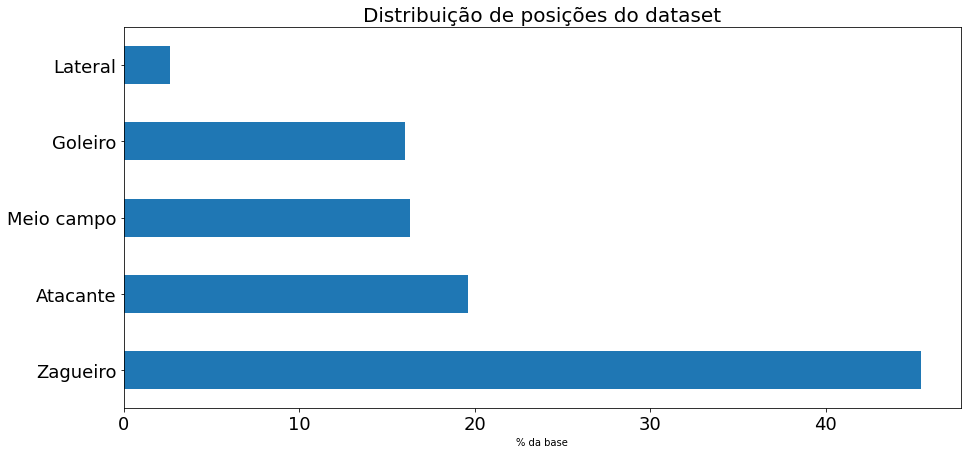

In [5]:
# Vamos usar a função de plot do próprio Dataframe, multiplicando por 100 para interpretarmos como percentual
plt.figure(figsize=(15,7))
(dados.posicao.value_counts(normalize=True)*100).plot(kind='barh')
plt.title('Distribuição de posições do dataset',size=20)
plt.xlabel("% da base")
plt.yticks(size=18)
plt.xticks(size=18)
plt.show()

Um dos recursos que já aprendemos e que podemos usar aqui é a correlação entre as features e a nossa variável de interesse! Podemos fazer isso usando o `boxplot`, gráfico útil para comparar variáveis numéricas e categóricas!

Vamos começar analisando variáveis de `salário` e `idade`

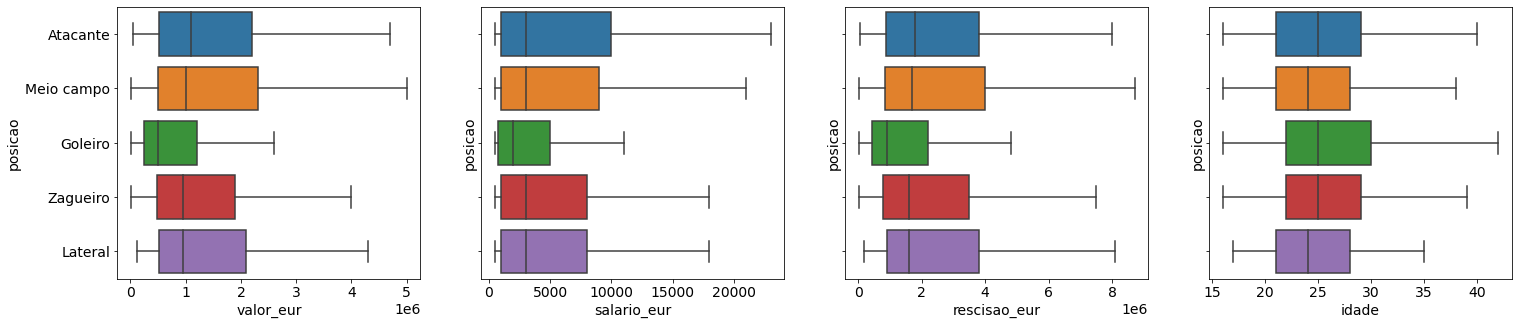

In [6]:
# Vamos fazer isso usando o comando 'for' pois o código fica mais enxuto
plt.rcParams['font.size'] = '14' # Para ajustar o tamanho de todas as fontes do matplotlib ao mesmo tempo
features_boxplot = ['valor_eur','salario_eur','rescisao_eur','idade']

fig, ax = plt.subplots(1,4,figsize=(25,5),sharey=True) # Construindo um 'grid' de gráficos de 1 linha e 4 colunas
for i in range(4):
    sns.boxplot(dados[features_boxplot[i]],dados.posicao,ax=ax[i],showfliers=False) #fliers são os outliers, não estamos mostrando

Agora analisando características mais globais:

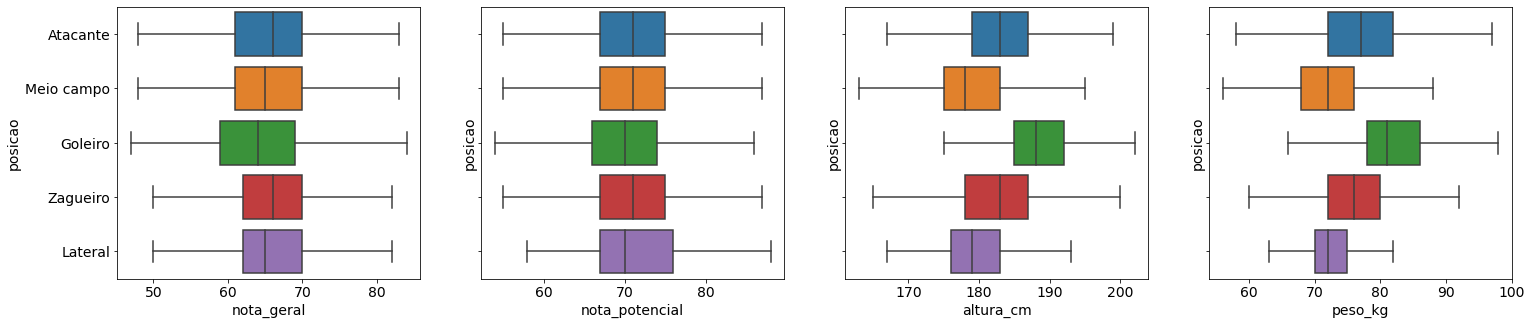

In [7]:
# Vamos fazer isso usando o comando 'for' pois o código fica mais enxuto
plt.rcParams['font.size'] = '14' # Para ajustar o tamanho de todas as fontes do matplotlib ao mesmo tempo
features_boxplot = ['nota_geral','nota_potencial','altura_cm','peso_kg']

fig, ax = plt.subplots(1,4,figsize=(25,5),sharey=True) # Construindo um 'grid' de gráficos de 1 linha e 4 colunas
for i in range(4):
    sns.boxplot(dados[features_boxplot[i]],dados.posicao,ax=ax[i],showfliers=False) #fliers são os outliers, não estamos mostrando

Por fim, vamos olhar para algumas características de jogo!

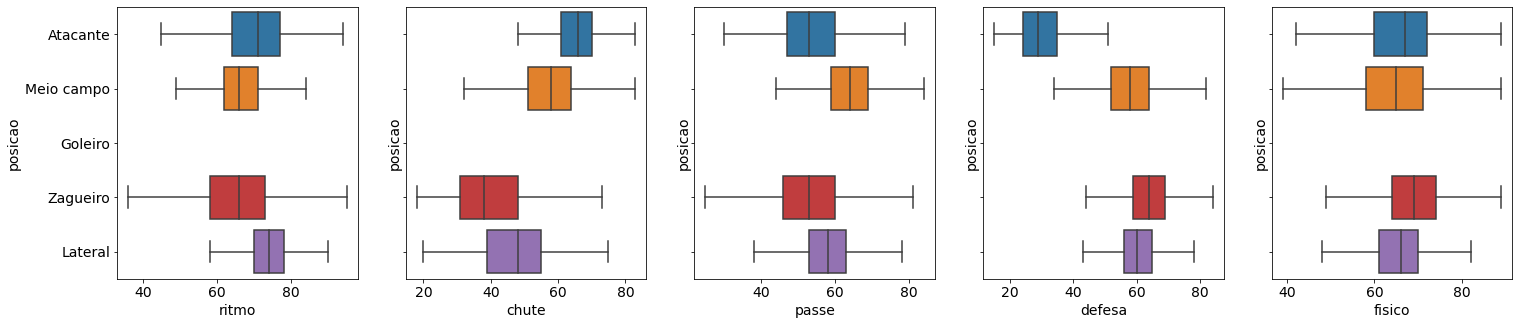

In [8]:
# Vamos fazer isso usando o comando 'for' pois o código fica mais enxuto
plt.rcParams['font.size'] = '14' # Para ajustar o tamanho de todas as fontes do matplotlib ao mesmo tempo
features_boxplot = ['ritmo','chute','passe','defesa','fisico']

fig, ax = plt.subplots(1,5,figsize=(25,5),sharey=True) # Construindo um 'grid' de gráficos de 1 linha e 4 colunas
for i in range(5):
    sns.boxplot(dados[features_boxplot[i]],dados.posicao,ax=ax[i],showfliers=False) #fliers são os outliers, não estamos mostrando

Podemos também analisar a correlação entre features usando o `pairplot`! Vamos aplicá-lo às características de jogo para entendermos as possíveis correlações

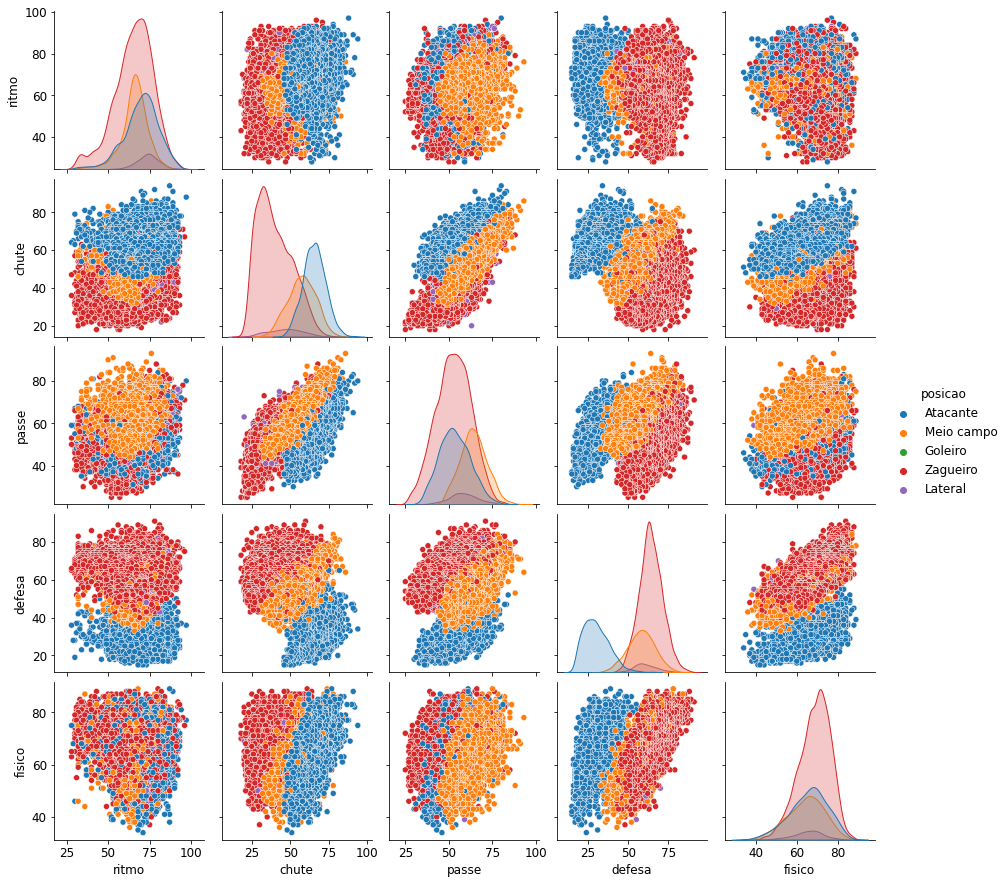

In [9]:
plt.rcParams['font.size'] = '12' # Para ajustar o tamanho de todas as fontes do matplotlib ao mesmo tempo
features_pairplot = ['ritmo','chute','passe','defesa','fisico']
sns.pairplot(dados[features_pairplot+['posicao']],hue='posicao')
plt.show()

## 2. Dataprep

Antes da modelagem, iremos tratar dados faltantes e estranhos que possam afetar nossa análise

Vamos começar analisando nossos dados faltantes! Para isso, vamos usar o `Missigno`:

In [10]:
# Quem não possuir o missigno instalado, descomente a linha abaixo para instalar
#!pip install missingno

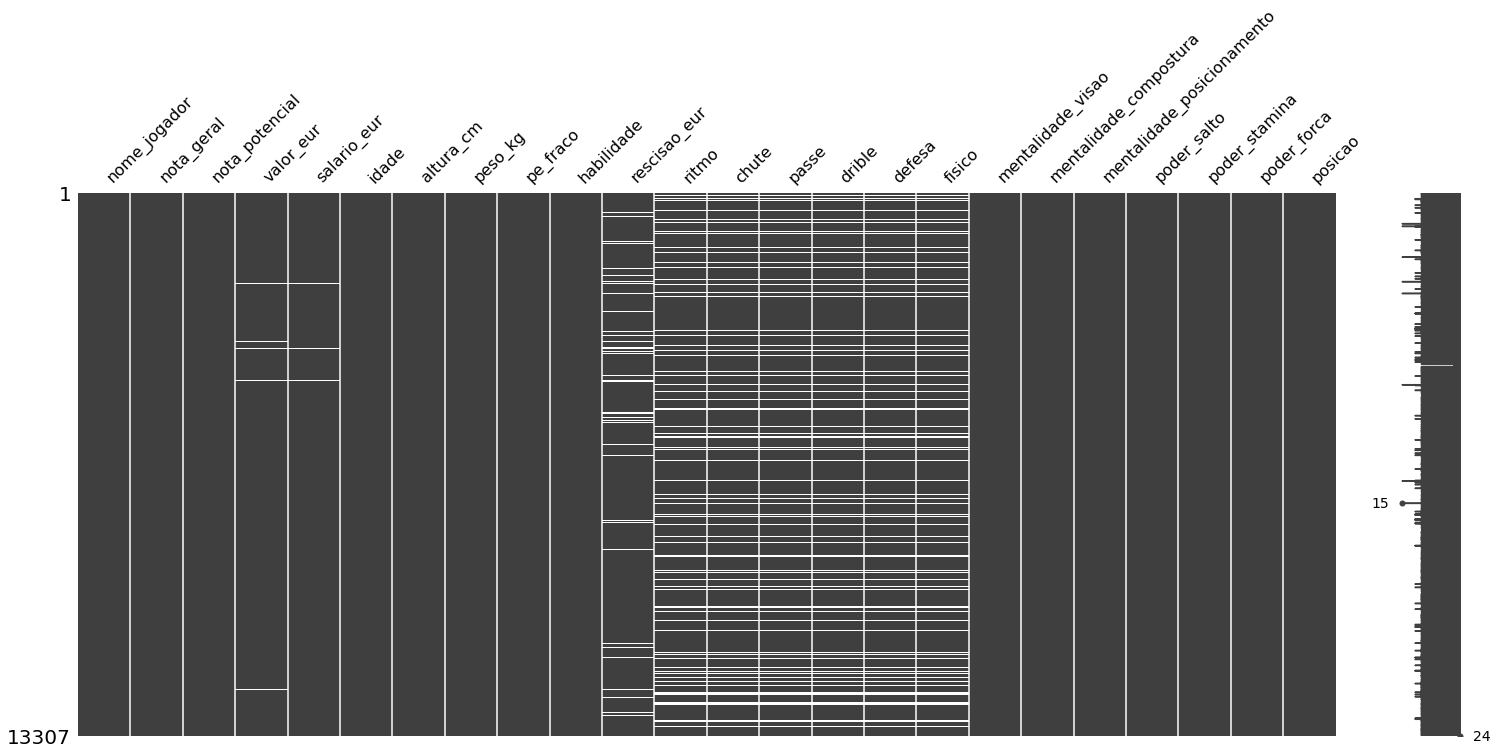

In [11]:
import missingno as msno

msno.matrix(dados)
plt.show()

Uma forma mais objetiva de ver os missings é usando o método `.isna()`, do Pandas:

In [12]:
dados.isna().mean().sort_values(ascending=False)*100

ritmo                         16.021643
fisico                        16.021643
defesa                        16.021643
drible                        16.021643
passe                         16.021643
chute                         16.021643
rescisao_eur                   6.177200
valor_eur                      0.368227
salario_eur                    0.315623
pe_fraco                       0.000000
nota_geral                     0.000000
nota_potencial                 0.000000
idade                          0.000000
altura_cm                      0.000000
peso_kg                        0.000000
posicao                        0.000000
habilidade                     0.000000
poder_forca                    0.000000
mentalidade_visao              0.000000
mentalidade_compostura         0.000000
mentalidade_posicionamento     0.000000
poder_salto                    0.000000
poder_stamina                  0.000000
nome_jogador                   0.000000
dtype: float64

Nessa situação, temos três tipos de colunas:
* Totalmente preenchidas
* Com missings mas em uma parte bem pequena dos dados (`valor_eur`, `salario_eur` e `rescisao_eur`)
* Com missings em mais do que 10% dos dados (`chute`, `passe`, `drible`, `defesa`, `fisico` e `ritmo`)

In [13]:
# Tratando dados faltantes
features_preenchimento = ['ritmo','fisico','defesa','drible','passe','chute']

# Para preencher os dados faltantes, vamos usar a função `.fillna()`, incluindo o valor 0 para essas features
dados[features_preenchimento] = dados[features_preenchimento].fillna(0)

# Para excluir dados com missings nas demais colunas, vamos usar a função `dropna()`, selecionando apenas as features específicas para isso
features_exclusao = ['valor_eur','salario_eur','rescisao_eur']
dados.dropna(subset=features_exclusao,inplace=True)

Vamos verificar nosso dataset agora, após as transformações!

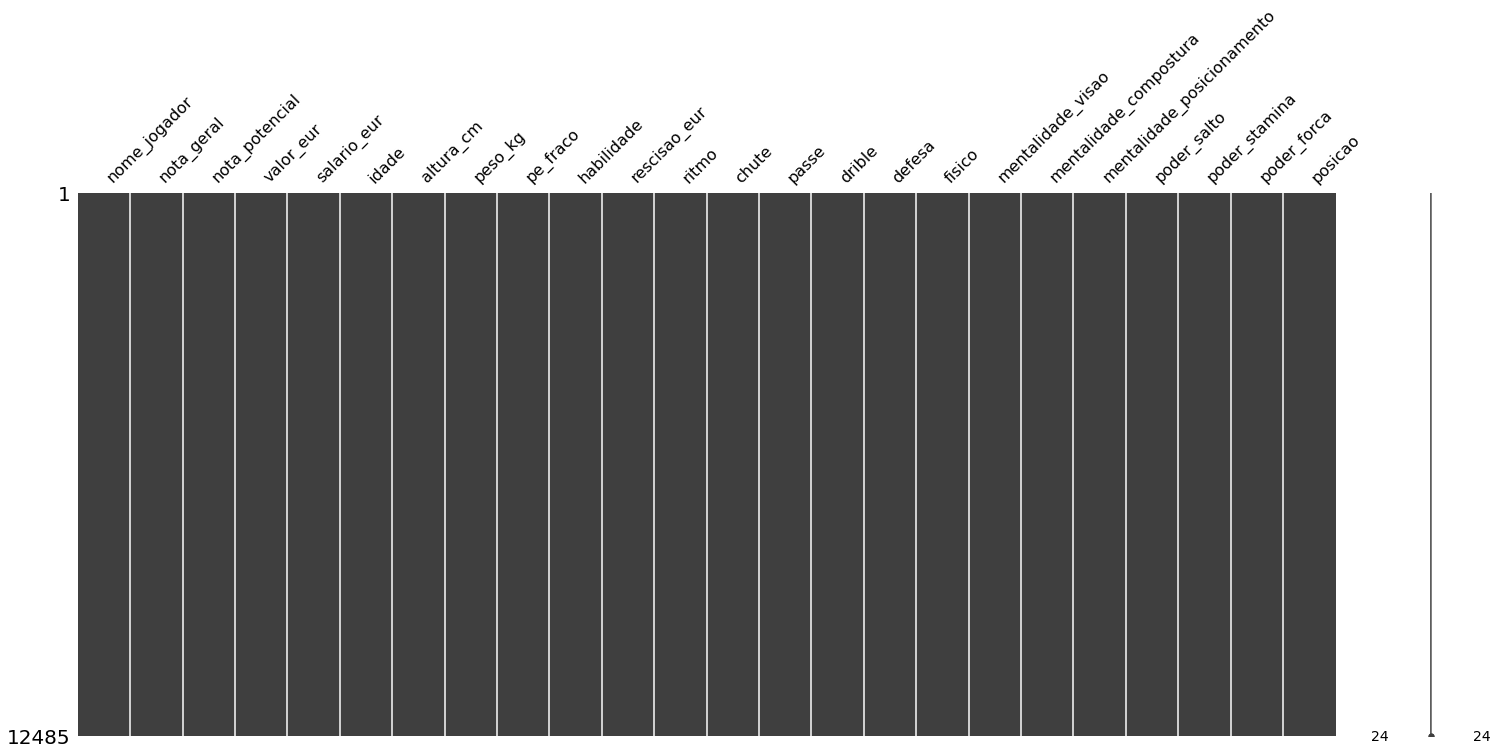

In [14]:
# Checando novamente o missingno após transformações
msno.matrix(dados)
plt.show()

### Separando os dados em treino e teste

Também iremos separar os dados entre treino e teste. Mas como fazer uma separação que maximize a performance dos modelos?

In [15]:
# Separando as features e as variáveis de interesse
X = dados.drop(['nome_jogador','posicao'],axis=1)
y = dados.posicao

In [16]:
dados.posicao.value_counts(normalize=True)

Zagueiro      0.457269
Atacante      0.189107
Goleiro       0.163636
Meio campo    0.163316
Lateral       0.026672
Name: posicao, dtype: float64

In [17]:
# Importando bibliotecas de separação dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [18]:
y_train.value_counts(normalize=True)

Zagueiro      0.455516
Atacante      0.189362
Meio campo    0.165011
Goleiro       0.164157
Lateral       0.025953
Name: posicao, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

Zagueiro      0.462524
Atacante      0.188341
Goleiro       0.162076
Meio campo    0.158232
Lateral       0.028828
Name: posicao, dtype: float64

## 3. Modelagem

Agora que preparamos nosso dataset, podemos treinar nosso modelo de previsão da posição dos jogadores!

### Opções multiclasse na regressão logística

A regressão logística que aprendemos, `LogisticRegression()` do `scikit-learn` possui métodos específicos para lidar com problemas multiclasse

In [20]:
# Importando as bibliotecas de modelagem
from sklearn.linear_model import LogisticRegression

# Instanciando uma regressão logística Multiclasse
modelo = LogisticRegression(
    multi_class='ovr' # ovr -> One vs. Rest, específico para multi classes
)

Como vamos usar uma regressão logística, precisamos antes realizar a `normalização dos dados`! Para isso, vamos usar um `StandardScaler`:

In [21]:
from sklearn.preprocessing import StandardScaler

# Escalando os dados
scaler = StandardScaler()
# Treinando o scaler
scaler.fit(X_train)

# Transformando os dados no treino e no teste -> Só podemos treinar o scaler com os dados de treino!
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [22]:
# Treinando o modelo nos dados de treino
modelo.fit(X_train_sc,y_train)

# Prevendo os resultados nos conjuntos de treino e de teste, usando o .predict()
y_pred_train = modelo.predict(X_train_sc)
y_pred_test = modelo.predict(X_test_sc)

# Verificando a base de predição de treino
y_pred_train

array(['Atacante', 'Meio campo', 'Zagueiro', ..., 'Atacante', 'Goleiro',
       'Meio campo'], dtype=object)

Apenas usando a opção `ovr`, conseguimos usar a mesma regressão logística (preparada para receber dados binários), mas para problemas multiclasse!

### Avaliando resultados

Vamos agora analisar os resultados do modelo treinado, verificando as métricas que revisamos e também construindo a nossa `Matriz de Confusão`

In [23]:
# Importando métricas
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix

# Calculando a matriz de confusão para os dados de treino e teste
matriz_confusao_treino = confusion_matrix(y_train,y_pred_train)
matriz_confusao_teste = confusion_matrix(y_test,y_pred_test)

# Ilustrando o dataset
matriz_confusao_treino

array([[1758,    0,    0,   11,    4],
       [   0, 1537,    0,    0,    0],
       [   0,    0,    0,   27,  216],
       [   8,    0,    0, 1488,   49],
       [   0,    0,    0,  130, 4135]], dtype=int64)

Como podemos ver, a matriz de confusão é apenas um vetor de vetores, mas podemos melhorar sua visualização se transformarmos esse resultado em um `DataFrame`

In [24]:
modelo.classes_

array(['Atacante', 'Goleiro', 'Lateral', 'Meio campo', 'Zagueiro'],
      dtype=object)

In [25]:
# Transformando a matriz de confusão em um dataframe
df_matriz_confusao_treino = pd.DataFrame(matriz_confusao_treino)
df_matriz_confusao_teste = pd.DataFrame(matriz_confusao_teste)

# Atribuindo as linhas e colunas como sendo o nome das classes
df_matriz_confusao_treino.index = modelo.classes_
df_matriz_confusao_treino.columns = modelo.classes_

df_matriz_confusao_teste.index = modelo.classes_
df_matriz_confusao_teste.columns = modelo.classes_

df_matriz_confusao_treino

,Atacante,Goleiro,Lateral,Meio campo,Zagueiro
Atacante,1758,0,0,11,4
Goleiro,0,1537,0,0,0
Lateral,0,0,0,27,216
Meio campo,8,0,0,1488,49
Zagueiro,0,0,0,130,4135


Para melhorar ainda mais nossa visualização, vamos fazer um `Heatmap` do dataframe final:

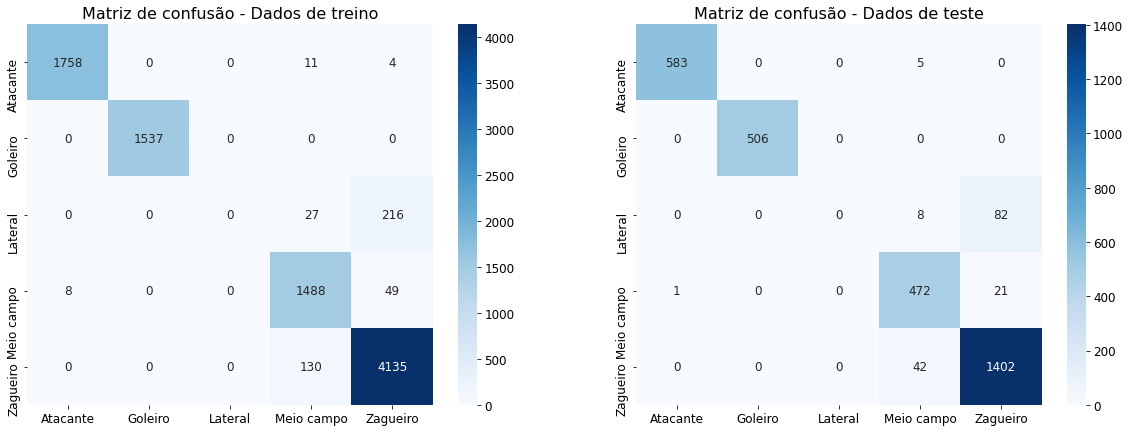

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,7)) # Grid de gráficos com 1 linha e 2 colunas

# Dados de treino
sns.heatmap(df_matriz_confusao_treino,cmap='Blues',annot=True,fmt='.0f',ax=ax[0])
ax[0].set_title('Matriz de confusão - Dados de treino',size=16)
# Dados de teste
sns.heatmap(df_matriz_confusao_teste,cmap='Blues',annot=True,fmt='.0f',ax=ax[1])
ax[1].set_title('Matriz de confusão - Dados de teste',size=16)
plt.show()

Para podermos ter uma noção melhor, podemos calcular as métricas de `precisão` e `recall`. Mas como temos mais do que duas classes, podemos escolher como sumarizar os resultados em `micro`, `macro` ou `average`

In [27]:
# Calculando precisão e recall com diferentes sumarizações

print('Precisão "micro": {:.2f}"'.format(precision_score(y_train,y_pred_train,average='micro')))
print('Precisão "macro": {:.2f}"'.format(precision_score(y_train,y_pred_train,average='macro')))
print('Precisão "weighted": {:.2f}"'.format(precision_score(y_train,y_pred_train,average='weighted')))

Precisão "micro": 0.95"
Precisão "macro": 0.77"
Precisão "weighted": 0.93"


Por que a precisão "macro" ficou pior do que as demais?

Repetindo o mesmo processo mas agora para `sensibilidade/recall`:

In [28]:
print('Recall "micro": {:.2f}"'.format(recall_score(y_train,y_pred_train,average='micro')))
print('Recall "macro": {:.2f}"'.format(recall_score(y_train,y_pred_train,average='macro')))
print('Recall "weighted": {:.2f}"'.format(recall_score(y_train,y_pred_train,average='weighted')))

Recall "micro": 0.95"
Recall "macro": 0.78"
Recall "weighted": 0.95"


### Classification report e a métrica local

Um aspecto que aprendemos em problemas multiclasse é o de que **cada métrica pode ser calculada para cada uma das classes**. E uma forma bastante simples de ver este comportamento é através do `classification_report`:

In [29]:
# Calculando um classification report dos dados de treino
cl_report_treino = classification_report(y_train,y_pred_train)

# Imprimindo o relatório
print(cl_report_treino)

              precision    recall  f1-score   support

    Atacante       1.00      0.99      0.99      1773
     Goleiro       1.00      1.00      1.00      1537
     Lateral       0.00      0.00      0.00       243
  Meio campo       0.90      0.96      0.93      1545
    Zagueiro       0.94      0.97      0.95      4265

    accuracy                           0.95      9363
   macro avg       0.77      0.78      0.78      9363
weighted avg       0.93      0.95      0.94      9363



Vamos representar agora o relatório nos dados de **teste**:

In [30]:
# Calculando um classification report dos dados de teste
cl_report_teste = classification_report(y_test,y_pred_test)

# Imprimindo o relatório
print(cl_report_teste)

              precision    recall  f1-score   support

    Atacante       1.00      0.99      0.99       588
     Goleiro       1.00      1.00      1.00       506
     Lateral       0.00      0.00      0.00        90
  Meio campo       0.90      0.96      0.92       494
    Zagueiro       0.93      0.97      0.95      1444

    accuracy                           0.95      3122
   macro avg       0.77      0.78      0.77      3122
weighted avg       0.92      0.95      0.94      3122



Mais conclusões?

## Tentando a abordagem One vs One

Vimos também a possibilidade de usarmos a técnica **One versus One**, onde treinamos modelos comparando cada classe duas a duas. Para usarmos essa abordagem, podemos usar a função `OneVsOneClassifier`

In [31]:
# Importando a função
from sklearn.multiclass import OneVsOneClassifier

# Instanciando o objeto
modelo_onevsone = OneVsOneClassifier(LogisticRegression())

# Treinando o modelo
modelo_onevsone.fit(X_train_sc,y_train)

# Prevendo sobre dados de treino e teste
y_pred_train_ovo = modelo_onevsone.predict(X_train_sc)
y_pred_test_ovo = modelo_onevsone.predict(X_test_sc)

Vamos agora comparar as performances das abordagens `One vs All` e `One vs One`

In [32]:
print('Precisão "micro" OvR - Treino: {:.4f}"'.format(precision_score(y_train,y_pred_train,average='micro')))
print('Precisão "micro" OvO - Treino: {:.4f}"'.format(precision_score(y_train,y_pred_train_ovo,average='micro')))
print('---------------------------------------')
print('Precisão "micro" OvR - Teste : {:.4f}"'.format(precision_score(y_test,y_pred_test,average='micro')))
print('Precisão "micro" OvO - Teste : {:.4f}"'.format(precision_score(y_test,y_pred_test_ovo,average='micro')))

Precisão "micro" OvR - Treino: 0.9525"
Precisão "micro" OvO - Treino: 0.9533"
---------------------------------------
Precisão "micro" OvR - Teste : 0.9491"
Precisão "micro" OvO - Teste : 0.9500"


O que precisamos para calcular a curva `ROC` são as taxas de `Falso Positivo`e de `Verdadeiro Positivo`. Porém vimos que podemos calcular estes valores para cada uma das classes! Para nos auxiliar nestes cálculos, podemos usar a função `roc_auc` da biblioteca `Yellowbricks`

In [33]:
# Caso não tenha instalado a biblioteca Yellowbricks, descomente a linha abaixo e rode ess célula
#!pip install -U yellowbrick

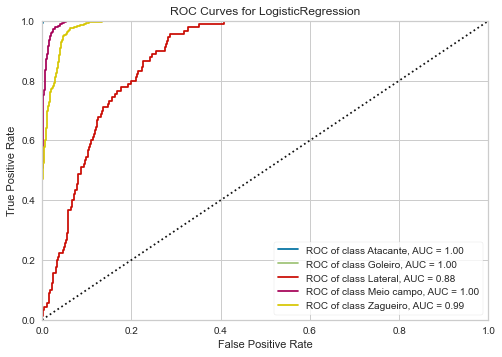

In [34]:
# Importando a biblioteca
from yellowbrick.classifier.rocauc import roc_auc

# Curvas ROC - Teste One vs. Rest
roc_auc(estimator=modelo, # Modelo a ser treinado
    X_train=X_train_sc,y_train=y_train,
    X_test=X_test_sc,y_test=y_test,
    micro=False,macro=False, # Indicando que não queremos as curvas de micro e macro
    is_fitted=False # Indicando que o estimador já está treinado
)
plt.show()

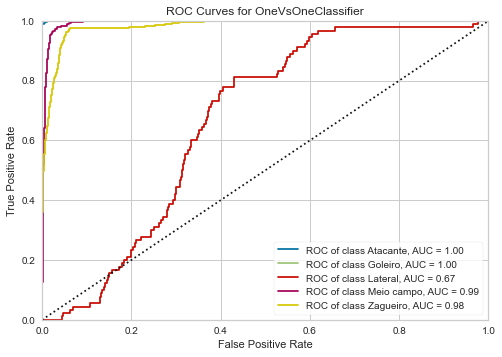

In [35]:

# Curvas ROC - Teste One vs. One
roc_auc(estimator=modelo_onevsone, # Modelo a ser treinado
    X_train=X_train_sc,y_train=y_train,
    X_test=X_test_sc,y_test=y_test,
    micro=False,macro=False, # Indicando que não queremos as curvas de micro e macro
    is_fitted=False # Indicando que o estimador irá ser treinado com os dados
        
)
ax[1].set_title('Curvas ROC - Regressão OvO',size=16)
ax[1].set_xlabel('% falsos positivos',size=14)
ax[1].set_ylabel('% verdadeiros positivos',size=14)
plt.show()

## 4. Técnicas de balanceamento

Nosso modelo teve a pior performance quando consideramos a classe miniotirária `Lateral`. Como podemos fazer para melhorar nossa performance?

Neste caso, a classe que teremos amostras artificiais será a `Lateral`

Uma das implementações possíveis do SMOTE está na biblioteca `imbalanced-learn`, que usaremos a seguir

In [36]:
# Caso não tenha a biblioteca instalada, descomente a linha abaixo e rode esta célula
#!pip install -U imbalanced-learn --user

In [37]:
# Importando a biblioteca
from imblearn.over_sampling import SMOTE

# Instanciando o SMOTE e ajustando aos dados de treino
X_bal, y_bal = SMOTE().fit_resample(X_train_sc,y_train)

# Checando proporções
y_bal.value_counts(normalize=True)

Goleiro       0.2
Lateral       0.2
Zagueiro      0.2
Atacante      0.2
Meio campo    0.2
Name: posicao, dtype: float64

Comparando com o dataset original, agora temos equilibrio entre as classes!

In [38]:
# Comparando com o dataset original
y_train.value_counts(normalize=True)

Zagueiro      0.455516
Atacante      0.189362
Meio campo    0.165011
Goleiro       0.164157
Lateral       0.025953
Name: posicao, dtype: float64

Com este novo dataset, agora podemos treinar novamente o modelo multiclasse

In [39]:
# Instanciando e treinando um modelo agora com as classes balanceadas
# Modelo OvR
modelo_bal_ovr = LogisticRegression(multi_class='ovr').fit(X_bal,y_bal)
# Modelo OvO
modelo_bal_ovo = OneVsOneClassifier(LogisticRegression()).fit(X_bal,y_bal)

Vamos avaliar novamente as curvas ROC nos dados de teste

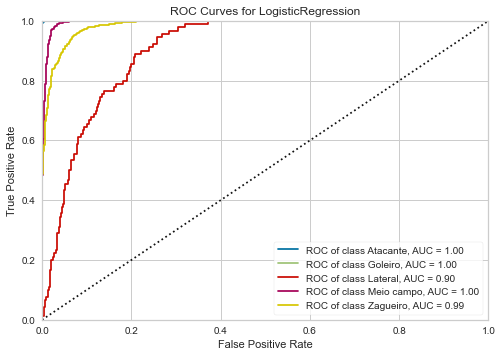

In [40]:
# Curvas ROC - Teste One vs. Rest
roc_auc(estimator=modelo_bal_ovr, # Modelo a ser treinado
        
    X_train=X_bal,y_train=y_bal, # Mudamos agora os dados!!!
        
    X_test=X_test_sc,y_test=y_test,
    micro=False,macro=False, # Indicando que não queremos as curvas de micro e macro
    is_fitted=False # Indicando que o estimador já está treinado
)
plt.show()

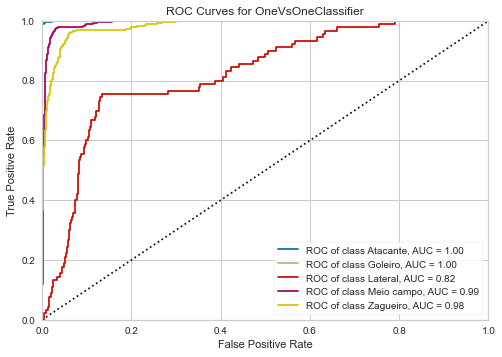

In [41]:
# Curvas ROC - Teste One vs. Rest
roc_auc(estimator=modelo_bal_ovo, # Modelo a ser treinado
        
    X_train=X_bal,y_train=y_bal, # Mudamos agora os dados!!!
        
    X_test=X_test_sc,y_test=y_test,
    micro=False,macro=False, # Indicando que não queremos as curvas de micro e macro
    is_fitted=False # Indicando que o estimador já está treinado
)
plt.show()

O valor de `ROC AUC` da classe `Lateral` teve uma melhora de **0.67 -> 0.81**!

Nosso modelo tomou as decisões diretamente, mas de fato o que ele fez foi escolher com base em **cortes de probabilidade**. Podemos acessar essas probabilidades com o método `.predict_proba()` da regressão logística

In [42]:
# Acessando as probabilidades do conjunto de teste, usando o modelo balanceado One vs. Rest
y_proba_teste = modelo_bal_ovr.predict_proba(X_test_sc)

df_y_proba_teste = pd.DataFrame(y_proba_teste,columns=modelo_bal_ovr.classes_) # Colunas serão o nome de cada classe
# Colocando também a decisão final do modelo
df_y_proba_teste['posicao_predita'] = modelo_bal_ovr.predict(X_test_sc)
df_y_proba_teste

,Atacante,Goleiro,Lateral,Meio campo,Zagueiro,posicao_predita
0,0.997663,6.560756e-05,1.192491e-03,9.645147e-04,0.000114,Atacante
1,0.000002,4.564496e-04,1.303157e-02,3.453162e-09,0.986510,Zagueiro
2,0.000091,9.995268e-01,7.114916e-09,1.832120e-29,0.000382,Goleiro
3,0.000948,9.965870e-01,3.862125e-08,2.127823e-34,0.002465,Goleiro
4,0.000020,9.860702e-06,6.238619e-01,2.053228e-06,0.376106,Lateral
...,...,...,...,...,...,...
3117,0.000498,2.006625e-07,8.720002e-02,8.574237e-01,0.054878,Meio campo
3118,0.000033,9.980172e-01,1.101585e-09,9.520605e-34,0.001950,Goleiro
3119,0.002232,5.850880e-08,6.468720e-02,8.971035e-01,0.035978,Meio campo
3120,0.989083,1.046846e-04,7.854980e-03,2.926838e-03,0.000031,Atacante


In [50]:
# Marcando a maior probabilidade
df_y_proba_teste['maior_prob'] = df_y_proba_teste[df_y_proba_teste.columns[:-1]].max(axis=1)

# Ordenando do menor para o maior e mostrando os primeiros 10 registros
df_y_proba_teste.sort_values(by='maior_prob').head(10)

,Atacante,Goleiro,Lateral,Meio campo,Zagueiro,posicao_predita,maior_prob,posicao_predita_corte
1781,0.041879,1.200332e-05,0.342485,0.312824,0.302800,Lateral,0.342485,Lateral
2651,0.000540,6.433121e-06,0.355808,0.313871,0.329774,Lateral,0.355808,Lateral
3107,0.360299,1.202773e-06,0.273404,0.366163,0.000133,Meio campo,0.366163,Meio campo
394,0.005483,4.245411e-07,0.370924,0.265384,0.358208,Lateral,0.370924,Lateral
932,0.063038,2.552901e-07,0.373959,0.322691,0.240311,Lateral,0.373959,Lateral
1245,0.001406,4.060897e-07,0.387254,0.309368,0.301971,Lateral,0.387254,Lateral
1254,0.000197,3.740440e-07,0.390299,0.254581,0.354924,Lateral,0.390299,Lateral
2385,0.000375,2.103398e-08,0.352995,0.395655,0.250975,Meio campo,0.395655,Meio campo
439,0.110283,3.935515e-07,0.403422,0.397060,0.089234,Lateral,0.403422,Lateral
370,0.001803,2.609948e-07,0.271778,0.318921,0.407498,Zagueiro,0.407498,Zagueiro


Por padrão, a `LogisticRegression()` prevê a classe **com maior probabilidade** como a escolhida para a previsão. Mas uma heurística possível para evitar casos em que o modelo está confuso é assumir como **Indefinindo** abaixo de algum limiar:

In [66]:
corte_indefinido = 0.4

# Determinando casos com a maior probabilidade abaixo de 30% como "Indefinido"

df_y_proba_teste['posicao_predita_corte'] = np.where(df_y_proba_teste.maior_prob<corte_indefinido,"Indefinido",df_y_proba_teste.posicao_predita)

#df_y_proba_teste[df_y_proba_teste.maior_prob<=corte_indefinido]['posicao_predita_corte'] = "Indefinido"
df_y_proba_teste.sort_values(by='maior_prob').head(10)

,Atacante,Goleiro,Lateral,Meio campo,Zagueiro,posicao_predita,maior_prob,posicao_predita_corte
1781,0.041879,1.200332e-05,0.342485,0.312824,0.302800,Lateral,0.342485,Indefinido
2651,0.000540,6.433121e-06,0.355808,0.313871,0.329774,Lateral,0.355808,Indefinido
3107,0.360299,1.202773e-06,0.273404,0.366163,0.000133,Meio campo,0.366163,Indefinido
394,0.005483,4.245411e-07,0.370924,0.265384,0.358208,Lateral,0.370924,Indefinido
932,0.063038,2.552901e-07,0.373959,0.322691,0.240311,Lateral,0.373959,Indefinido
1245,0.001406,4.060897e-07,0.387254,0.309368,0.301971,Lateral,0.387254,Indefinido
1254,0.000197,3.740440e-07,0.390299,0.254581,0.354924,Lateral,0.390299,Indefinido
2385,0.000375,2.103398e-08,0.352995,0.395655,0.250975,Meio campo,0.395655,Indefinido
439,0.110283,3.935515e-07,0.403422,0.397060,0.089234,Lateral,0.403422,Lateral
370,0.001803,2.609948e-07,0.271778,0.318921,0.407498,Zagueiro,0.407498,Zagueiro


* Em problemas multiclasse, podemos usar um modelo binário e considerar as classes individualmente (`One vs. Rest`) ou duas a duas (`One vs. One`)
* Todas as métricas que já conhecemos para problemas de classificação binários se aplicam para problemas multiclasse. Podemos calculá-las todas de uma vez com o `classification_report`
* A Curva `ROC` nos permite calcular uma métrica que define o quão bem nosso modelo separa as classes; balanceamentos de classe como o `SMOTE` melhoram a performance geral dos modelos!